<a href="https://colab.research.google.com/github/DarekGit/FACES_DNN/blob/master/notebooks/02_01_mAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[2. Metryki oceny detekcji](https://github.com/DarekGit/FACES_DNN/blob/master/notebooks/02_00_Miary.ipynb)

#  Przykład użycia mAP.py

In [ ]:
!git clone https://github.com/DarekGit/mAP.git

Cloning into 'mAP'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


In [ ]:
#!mkdir mAP/
#!mkdir mAP/data/
#!wget -q -O mAP/data/MTCNN_results.json https://drive.google.com/uc?id=1jSW4LWNiOeT_k3QzRf_awvM9rx5JKmtt
#!wget -q -O mAP/mAP.py https://drive.google.com/uc?id=1PtEsobTFah3eiCDbSsYblOGbe2fmkjGR

All 0.50:   AP: 92.39%   Recall: 92.84%   IoU: 0.5
large   :   AP: 98.01%   Recall: 98.09%   IoU: 0.5
medium  :   AP: 90.34%   Recall: 91.17%   IoU: 0.5
small   :   AP: 56.82%   Recall: 62.63%   IoU: 0.5
mAP     :   AP: 50.49%   Recall: 57.50%   IoU: 0.5 - 0.95


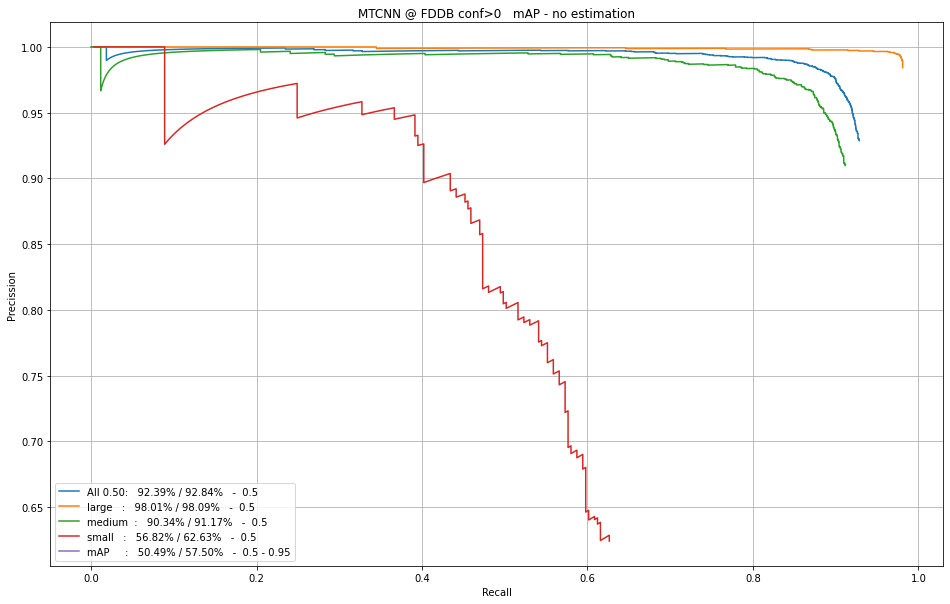

dict_keys(['All 0.50', 'All 0.55', 'All 0.60', 'All 0.65', 'All 0.70', 'All 0.75', 'All 0.80', 'All 0.85', 'All 0.90', 'All 0.95', 'All 0.00', 'mAP', 'small', 'medium', 'large'])


In [ ]:
import numpy as np
import json

with open('mAP/data/MTCNN_results.json','r') as f:
  mt_res=json.load(f)

from mAP.mAP import mAP, plot_mAP

#lista po obrazach list boxow [[[t,l,b,r]*n]*imgs], dla detected z confidence [[[t,l,b,r,conf]*n]*imgs]
gbxs=[ [[*(np.array(bx)+0.5).astype('int')] for bx in img['FDDB']['ebxs']] for img in mt_res]
dbxs=[ [[*(np.array(bx)+0.5).astype('int'),img['confs'][i]] for i,bx in enumerate(img['dbxs'])] for img in mt_res]

IoUs=[.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.0]
m,d=mAP(gbxs,dbxs,data=True)
plot_mAP(m,d,['All 0.50','mAP','large','medium','small'],1,'MTCNN @ FDDB conf>0  ',file='MTCNN_mAP')
print(m.keys())

All 0.50:   AP: 92.39%   Recall: 92.84%   IoU: 0.5
All 0.55:   AP: 90.90%   Recall: 91.72%   IoU: 0.55
All 0.60:   AP: 88.56%   Recall: 89.89%   IoU: 0.6
All 0.65:   AP: 83.64%   Recall: 86.66%   IoU: 0.65
All 0.70:   AP: 71.43%   Recall: 79.13%   IoU: 0.7
All 0.75:   AP: 49.46%   Recall: 65.36%   IoU: 0.75
All 0.80:   AP: 23.50%   Recall: 44.63%   IoU: 0.8
All 0.85:   AP:  4.78%   Recall: 19.84%   IoU: 0.85
All 0.90:   AP:  0.28%   Recall:  4.72%   IoU: 0.9
All 0.95:   AP:  0.00%   Recall:  0.19%   IoU: 0.95
All 0.00:   AP: 93.54%   Recall: 93.77%   IoU: 0.0
small   :   AP: 56.82%   Recall: 62.63%   IoU: 0.5
medium  :   AP: 90.34%   Recall: 91.17%   IoU: 0.5
large   :   AP: 98.01%   Recall: 98.09%   IoU: 0.5
mAP     :   AP: 50.49%   Recall: 57.50%   IoU: 0.5 - 0.95


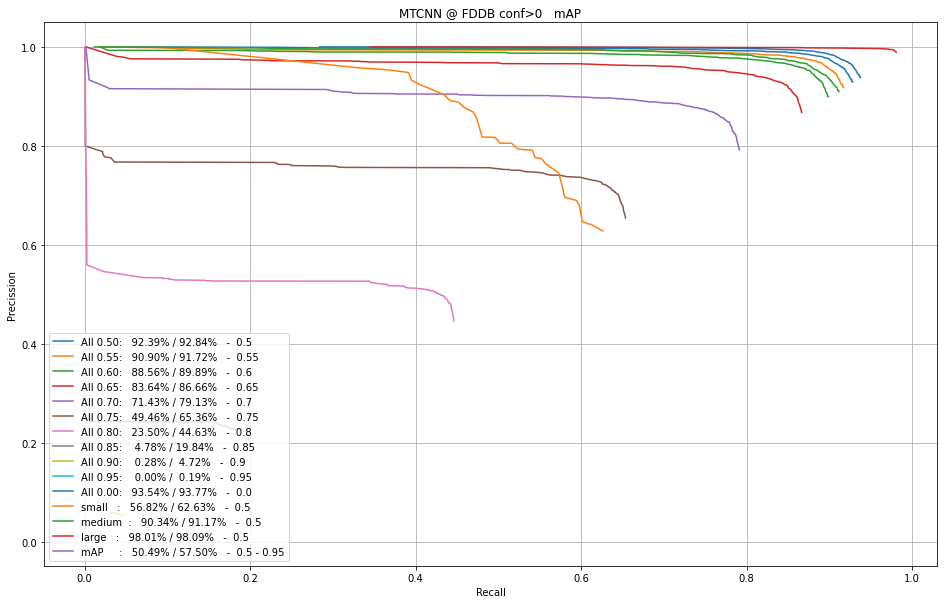

In [ ]:
plot_mAP(*mAP(gbxs,dbxs,data=True),'All',0,'MTCNN @ FDDB conf>0  ',file='MTCNN_inter_mAP')

In [ ]:
!wget -q -O FDDB_statics.json https://drive.google.com/uc?id=1-FSn0LbnvpkVJhZP6gVcBz9BKHjx66kH
with open('FDDB_statics.json','r') as f:
  statics=json.load(f)

metr,_=mAP(gbxs,dbxs)
statics['MTCNN']=metr.copy()

statics['MTCNN']['desc']='mAP/ReCall/Iou for MTCNN @ FDDB with conf>0'
with open('FDDB_statics.json','w') as f:
  json.dump(statics,f)
metr

{'All 0.00': (0.9354371919269586, 0.9377296461032683, 0.0),
 'All 0.50': (0.9239220061686285, 0.9284471088764262, 0.5),
 'All 0.55': (0.9089566907379236, 0.9172307097273255, 0.55),
 'All 0.60': (0.8856469291460431, 0.8988590214658674, 0.6),
 'All 0.65': (0.8363688190158068, 0.8665635273641462, 0.65),
 'All 0.70': (0.7142728476346468, 0.7913362985882808, 0.7),
 'All 0.75': (0.4945671321767645, 0.6536453297234578, 0.75),
 'All 0.80': (0.23498419618412958, 0.44633533165731964, 0.8),
 'All 0.85': (0.04776025842144518, 0.19841423322374782, 0.85),
 'All 0.90': (0.0027697046551552326, 0.04718623090311352, 0.9),
 'All 0.95': (5.018223485428907e-06, 0.0019338619222587507, 0.95),
 'large': (0.9800925951585218, 0.9809128630705394, 0.5),
 'mAP': (0.5049253602364029, 0.5749951653451943, None),
 'medium': (0.903382348832014, 0.9116935483870968, 0.5),
 'small': (0.5682042985784886, 0.6263345195729537, 0.5)}

In [ ]:
import numpy as np
from operator import itemgetter
import matplotlib.pyplot as plt

In [ ]:
def IoU(ground_box,det_box):
  l,t,r,b = ground_box[0:4]; ll,tt,rr,bb = det_box[0:4]
  lstar = max(l,ll); rstar = min(r,rr)
  if lstar>rstar: return 0. # since there is no intersection
  tstar = max(t,tt); bstar = min(b,bb)
  if tstar>bstar: return 0. # since there is no intersection
  
  garea = (r-l+1)*(b-t+1)
  darea =(rr-ll+1)*(bb-tt+1)
  iarea = (rstar-lstar+1)*(bstar-tstar+1)
  return iarea/(garea+darea-iarea)

In [ ]:
#uzupelnianie metryki wynikow, wyliczenie IoU, wybor TruePositive oraz FP i FN
def classify(gts,dts):
  xg=len(gts); yd=len(dts)
  if xg*yd >0:
      MIoU =np.zeros((yd,xg))/1.
      for i in range(yd*xg): #wyliczenie IoU dla macierzy y detekcji i x anotacji (real)
        MIoU[i//xg,i%xg]=IoU(gts[i%xg],dts[i//xg])
      TP=[]
      FP=list(np.arange(yd)/1.)
      FN=list(np.arange(xg)/1.) 
      for i in range(xg): # wyszukanie maksymalnych IoU >0 dla x rzeczywistych twarzy (annotation)
        a=np.argmax(MIoU); k,w =a//xg,a%xg
        if MIoU[k,w]>0:
          TP.append([k/1.,w/1.,MIoU[k,w]]); MIoU[:,w]=0.; MIoU[k,:]=0.
          FP[k]=-1.; FN[w]=-1.
      FP=[e for e in FP if e>-1]; FN=[e for e in FN if e>-1]
  else: #no intersections
    TP=[]
    if xg>0: FN=list(np.arange(xg)/1.); FP=[] #brak detekcji
    else: FP=list(np.arange(yd)/1.); FN=[]  #brak anotacji
  return TP,FN,FP

In [ ]:
#flat list of ground true and detected boxes sorted by decreasing confidence 
#[size,t,l,b,r,conf,IoU,gt_id]
def lists(gbxs,dbxs,conf_t=0):
  dts=[[[(bx[2]-bx[0]+1)*(bx[3]-bx[1]+1),*bx,0,-1] for bx in img if bx[4]>=conf_t ] for img in dbxs]
  gts=[[[(bx[2]-bx[0]+1)*(bx[3]-bx[1]+1),*bx] for bx in img] for img in gbxs]
  dts_f=[];gts_f=[] 
  for i,img in enumerate(dts):
    TP,_,_=classify([[*np.array(bx)[1:5]] for bx in gts[i]],[[*np.array(bx)[1:5]] for bx in img])
    for k,w,IoU in TP:
      k=int(k); w =int(w)
      img[k][6]=IoU; #IoU
      img[k][7]=w; #wskaznik box for gbx 
      img[k][0]=gts[i][w][0] #size for box from gbx
    for bx in img:
      dts_f.append(bx)
  dts_f=sorted(dts_f,key=itemgetter(5),reverse=True)

  for img in gts:
    for bx in img:
      gts_f.append(bx)

  return gts_f,dts_f

In [ ]:
def AP_R(dts_f,gt_nb,IoU_t=0.5,data=False):
  r_p_full=[]; det_nb=0; tp_nb=0
  for bx in dts_f: #narastajace wyliczenie precission TP/Det dla recall wzgledem wszystkich GT 
    det_nb+=1
    if bx[6]>IoU_t: tp_nb+=1
    r_p_full.append([tp_nb/gt_nb,tp_nb/det_nb])
  r_p_full=sorted(r_p_full,key=itemgetter(0))
  rM=-1; r_p=[]
  for r,p in r_p_full: #uszeregowanie po recall
    if r>rM: r_p.append([r,p]); rM=r
    else: 
      if p>r_p[-1][1]: r_p[-1][1]=p
  r_p_rev=np.array(r_p[::-1])
  i=-1; r_p_int=[]
  while i>0 or i==-1: #lista recall dla kolejnych maksymów precission
    i=np.argmax(r_p_rev[0:i,1])
    r_p_int.append([*r_p_rev[i]])

  AP=0; rp=0
  for r,p in r_p_int: AP+=(r-rp)*p; rp=r

  if data: return (AP,r_p_int[-1][0],IoU_t),(r_p_int,r_p_full)
  else: return (AP,r_p_int[-1][0], IoU_t),()

In [ ]:
def mAP(gbxs,dbxs,conf_t=0,IoUs=[],data=False):
  mAP={}; Data={}; 
  if IoUs is None: IoUs=[.5]
  if IoUs==[] or type(IoUs)!=list: IoUs=[.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.0]
  gts,dts=lists(gbxs,dbxs,conf_t=conf_t)
  for IoU in IoUs:
    key='All ' + '{:.2f}'.format(IoU)
    mAP[key],Data[key]=AP_R(dts,len(gts),IoU_t=IoU,data=data)
  AP_temp, R_temp =[],[]
  for IoU in [.5,.55,.6,.65,.7,.75,.8,.85,.9,.95]:
    (ap,r,_),_=AP_R(dts,len(gts),IoU_t=IoU,data=False)
    AP_temp.append(ap); R_temp.append(r)
  mAP['mAP'] =(sum(AP_temp)/10,sum(R_temp)/10,None)
  
  gt=[x for x in gts if x[0]<=32**2]; dt=[x for x in dts if x[0]<=32**2]
  mAP['small'],Data['small']=AP_R(dt,len(gt),IoU_t=IoUs[0],data=data)
  gt=[x for x in gts if x[0]>32**2 and x[0]<=96**2]; dt=[x for x in dts if x[0]>32**2 and x[0]<=96**2]
  mAP['medium'],Data['medium']=AP_R(dt,len(gt),IoU_t=IoUs[0],data=data)
  gt=[x for x in gts if x[0]>96**2]; dt=[x for x in dts if x[0]>96**2]
  mAP['large'],Data['large']=AP_R(dt,len(gt),IoU_t=IoUs[0],data=data) 


  return mAP,Data

In [ ]:
def plot_mAP(met,data,keys,r_p=1,title='',file='mAP',figsize=(16,10)):
  fig, ax = plt.subplots(figsize=figsize)
  legend=[]
  if r_p!=1:r_p=0
  if keys=='All': keys=met.keys()
  for k in keys:
    if k in data.keys():
      print('{:8}:   AP: {:5.2f}%   Recall: {:5.2f}%   IoU: {:.2f}'.format(k,met[k][0]*100,met[k][1]*100,met[k][2]))
      legend.append('{:8}:   {:5.2f}% / {:5.2f}%   -  {:.2f}'.format(k,met[k][0]*100,met[k][1]*100,met[k][2]))
      r=np.array(data[k][r_p])[:,0]; p=np.array(data[k][r_p])[:,1]
      ax.plot(r,p )
  if 'mAP' in keys:
      k='mAP'
      print('{:8}:   AP: {:5.2f}%   Recall: {:5.2f}%   IoU: 0.5 - 0.95'.format(k,met[k][0]*100,met[k][1]*100))
      legend.append('{:8}:   {:5.2f}% / {:5.2f}%   -  0.5 - 0.95'.format(k,met[k][0]*100,met[k][1]*100))
      ax.plot(0,1)
  title+=' mAP'
  if r_p==1: title+=' - no inter' 
  plt.legend(legend, loc='lower left')
  ax.set(xlabel='Recall', ylabel='Precission',title=title)
  ax.grid()
  file=file.split('.')[0]+'.png'; fig.savefig(file)
  plt.show()

[2. Metryki oceny detekcji](https://github.com/DarekGit/FACES_DNN/blob/master/notebooks/02_00_Miary.ipynb)
<br>[3. Bazy danych](https://github.com/DarekGit/FACES_DNN/blob/master/notebooks/03_00_Datasety.ipynb) 
### [Spis treści](https://github.com/DarekGit/FACES_DNN/blob/master/notebooks/Praca_Dyplomowa.ipynb)